In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src')
import kernels

plt.rcParams.update({'font.family':'Arial', 'font.size': 10})

# Original Stokes' Kernel

Define spherical distance

In [12]:
sph_dist = np.arange(1,181)
sph_dist = np.radians(sph_dist)

Call `kernels.stokes_func` to estimate Stokes' function at a given spherical distance

In [13]:
S = kernels.stokes_func(sph_dist)

Let's see how it looks

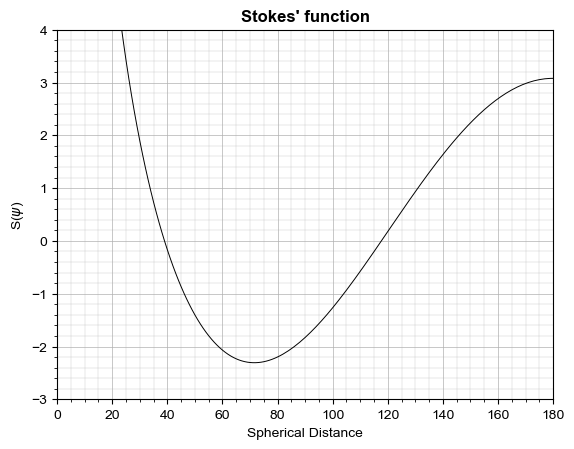

In [14]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,181), S, color='k', linewidth=.7)
ax.set_ylim([-3, 4])
ax.set_xlim([0, 180])
ax.set_title('Stokes\' function', fontweight='bold')
ax.grid(linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', linewidth=0.2)
ax.set_xlabel('Spherical Distance')
ax.set_ylabel(r'S($\psi$)')
plt.show()

If you have access to the 2nd edtion of the book Physical Geodesy by Hofmann-Wellenhof and Moritz, go to Page 107 and compare Fig 2.17 with our output.

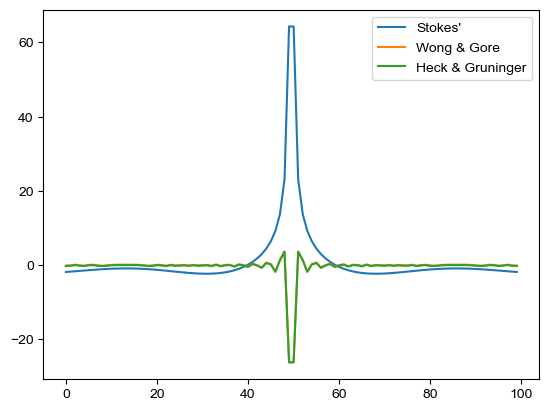

In [15]:
lon = np.linspace(-180, 180, 100)
lat = np.linspace(-90, 90, 100)
comp_point = [0, 0]
int_points = np.array([lon, lat]).T
psi_0 = 1
nmax = 60

S, cos_psi = kernels.stokes(comp_point, int_points)
S_wg = kernels.wong_and_gore(comp_point, int_points, nmax)
S_hg = kernels.heck_and_gruninger(comp_point, int_points, psi_0, nmax)

stokes_kernels = [S, S_wg, S_hg]
kernel_names = ['Stokes\'', 'Wong & Gore', 'Heck & Gruninger']

fig, ax = plt.subplots()

for kname, kernel in zip(kernel_names, stokes_kernels):
    ax.plot(kernel, label=kname)

ax.legend()
plt.show()

In [17]:
from numpy import (
    sin, cos, radians, 
    sqrt, log, array,
    zeros_like, degrees
)

from legendre import legendre_poly

def stokes_from_distance(psi):
    '''
    Calculate the Original Stokes' function from spherical distance
    
    Parameters
    ----------
    psi : array-like
          Spherical distance in radians
    
    Returns
    -------
    S         : Stokes' function
    cos_psi   : Cosine of spherical distance
    '''
    cos_psi = cos(psi)
    
    # Calculate sin^2(psi/2) using the relationship sin^2(psi/2) = (1 - cos(psi)) / 2
    sin2_psi_2 = (1 - cos_psi) / 2
    
    # Calculate Stokes' function S
    S = 1 / sqrt(sin2_psi_2) - 6 * sqrt(sin2_psi_2) + 1 - 5 * cos_psi - \
        3 * cos_psi * log(sqrt(sin2_psi_2) + sin2_psi_2)
    
    return S, cos_psi


def wong_and_gore_from_distance(psi, nmax):
    '''
    Wong and Gore's modification of Stokes' function from spherical distance
    
    Parameters
    ----------
    psi   : array-like
            Spherical distance in radians
    nmax  : Maximum degree of expansion
    
    Returns
    -------
    S_wg  : Modified Stokes' function
    '''
    # Calculate original Stokes' function
    S, cos_psi = stokes_from_distance(psi)
    
    # Wong and Gore's modification
    S_wg = zeros_like(cos_psi)
    for i, t in enumerate(cos_psi):
        Pn = legendre_poly(t=t, nmax=nmax)
        sum_term = 0
        for n in range(2, nmax + 1):
            sum_term += (2 * n + 1) / (n - 1) * Pn[n]
        S_wg[i] = S[i] - sum_term
    
    return S_wg


def heck_and_gruninger_from_distance(psi, psi_0, nmax):
    '''
    Heck and Gruninger's modification of Stokes' function from spherical distance
    
    Parameters
    ----------
    psi   : array-like
            Spherical distance in radians
    psi_0 : Spherical distance of the spherical cap in radians
    nmax  : Maximum degree of expansion
    
    Returns
    -------
    S_hg  : Heck and Gruninger's modification of Stokes' function
    '''
    # Calculate original Stokes' function
    S, cos_psi = stokes_from_distance(psi)
    
    # Wong and Gore
    S_wg = wong_and_gore_from_distance(psi, nmax)
    
    # Stokes' function for a spherical cap (psi_0)
    S_0, cos_psi_0 = stokes_from_distance(psi_0)
    
    # Wong and Gore for spherical cap (psi_0)
    t = cos_psi_0
    Pn = legendre_poly(t=t, nmax=nmax)
    S_wgL = 0
    for n in range(2, nmax + 1):
        S_wgL += (2 * n + 1) / (n - 1) * Pn[n]
    
    # Heck and Gruninger
    S_hg = S_wg - (S_0 - S_wgL)
    
    return S_hg


In [38]:
from kernels import stokes_func

In [35]:
psi = np.arange(0.1, 4.1, 0.01)
nmax = 257

In [49]:
S, _ = stokes_from_distance(radians(psi))
S_wg = wong_and_gore_from_distance(radians(psi), nmax)
S_hg = heck_and_gruninger_from_distance(radians(psi), radians(120), nmax)
# S = stokes_func(radians(psi))

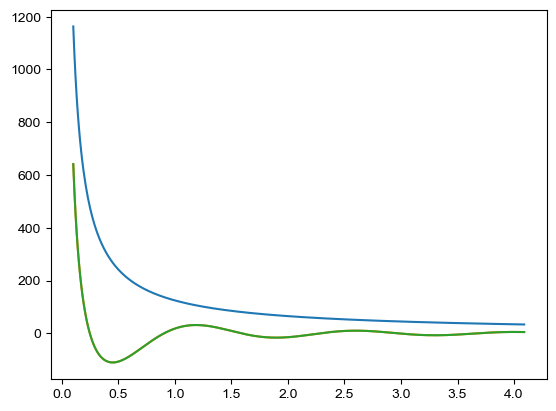

In [50]:
plt.plot(psi, S)
plt.plot(psi, S_wg)
plt.plot(psi, S_hg)

In [22]:
psi

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])